In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
with ZipFile('drive/MyDrive/Flowers-Dataset.zip','r') as zipObj:
  zipObj.extractall('drive/MyDrive/Flower1')

Data Augmentation

In [ ]:
from glob import glob
from PIL import Image
from numpy import asarray
import numpy as np

In [ ]:
frompath='/content/drive/Flower1/flowers/rose'
topath='/content/drive/Flower1'
folder='rose'
topath=topath+'/'+folder+'/'

In [ ]:
images=glob(frompath+'/"')
c=0
for path in images:
  img=Image.open(path)
  img=img.resize((224,224))
  img.save(topath+str(c)+'.jpg')
  c+=1
  miring=img.transpose(Image.FLIP_LEFT_RIGHT)
  miring.save(topath+str(c)+'.jpg')
  c+=1
  rotating=img.rotate(90,Image.NEAREST,expand = 1)
  rotating.save(topath+str(c)+'.jpg')
  c+=1
  mirroting=rotating.transpose(Image.FLIP_LEFT_RIGHT)
  mirroting.save(topath+str(c)+'.jpg')
  c+=1

Image Augmentation

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Flower1/flowers/rose/3667366832_7a8017c528_n.jpg')
height,width = image.shape[:2]
resized_image=cv2.resize(image, (3*width,3*height),interpolation=cv2.INTER_CUBIC)

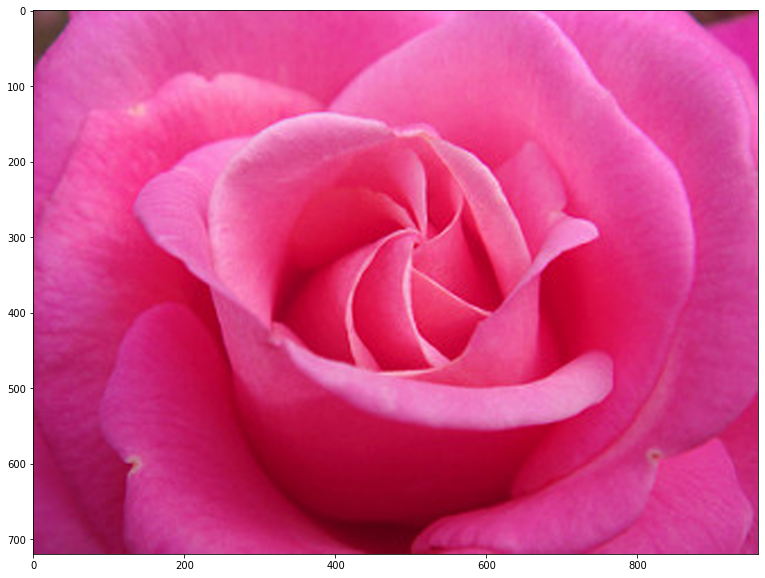

In [ ]:
fig= plt.gcf()

fig.set_size_inches(18,10)
#fig.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
pip install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install ipyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.6 MB/s 


In [ ]:
import imageio
import ipyplot
import imgaug as ia
import imgaug.augmenters as iaa


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


In [ ]:
input_img = imageio.imread('/content/drive/MyDrive/Flower1/flowers/rose/10090824183_d02c613f10_m.jpg')

In [ ]:
hflip= iaa.Fliplr(p=1.0)
input_hf= hflip.augment_image(input_img)


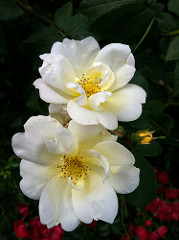
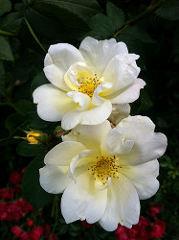
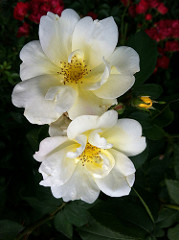


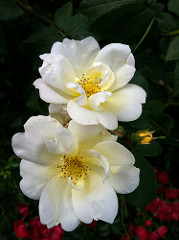
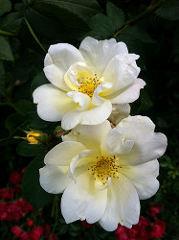
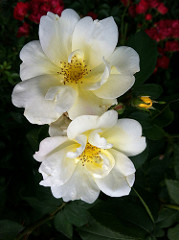

In [ ]:
vflip= iaa.Flipud(p=1.0) 
input_vf= vflip.augment_image(input_img)
images_list=[input_img, input_hf, input_vf]
labels = ['Original', 'Horizontally flipped', 'Vertically flipped']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


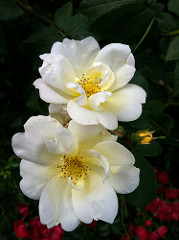
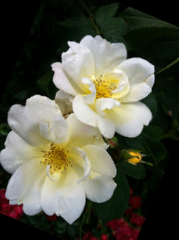


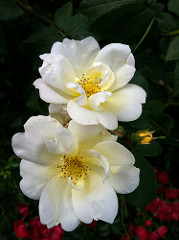
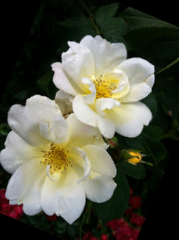

In [ ]:
rot1 = iaa.Affine(rotate=(-30,30))
input_rot1 = rot1.augment_image(input_img)
images_list=[input_img, input_rot1]
labels = ['Original', 'Rotated Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


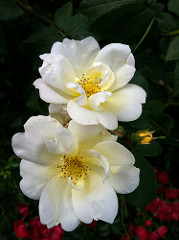
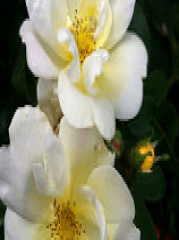


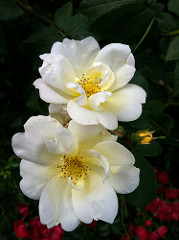
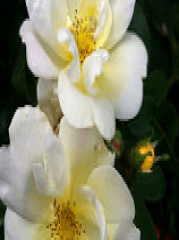

In [ ]:
crop1 = iaa.Crop(percent=(0, 0.3)) 
input_crop1 = crop1.augment_image(input_img)
images_list=[input_img, input_crop1]
labels = ['Original', 'Cropped Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


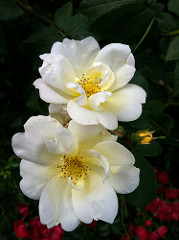
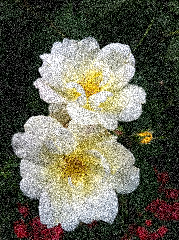


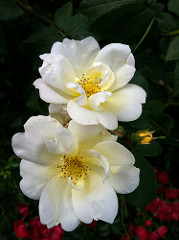
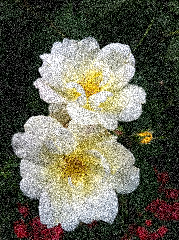

In [ ]:
noise=iaa.AdditiveGaussianNoise(10,40)
input_noise=noise.augment_image(input_img)
images_list=[input_img, input_noise]
labels = ['Original', 'Gaussian Noise Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


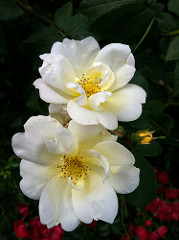
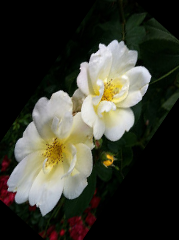


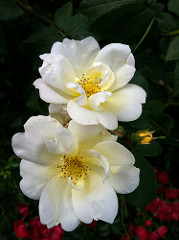
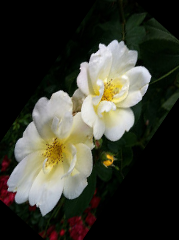

In [ ]:
shear = iaa.Affine(shear=(-40,40))
input_shear=shear.augment_image(input_img)
images_list=[input_img, input_shear]
labels = ['Original', 'Image Shearing']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


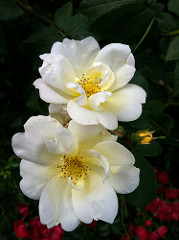
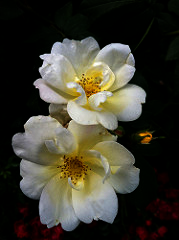
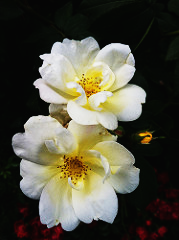
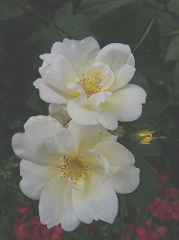


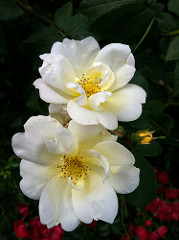
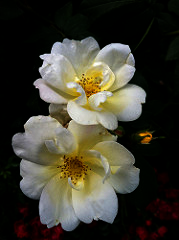
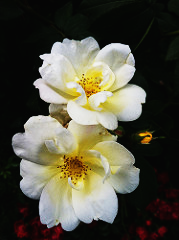
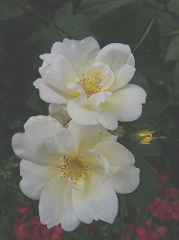

In [ ]:
contrast=iaa.GammaContrast((0.5, 2.0))
contrast_sig = iaa.SigmoidContrast(gain=(5, 10), cutoff=(0.4, 0.6))
contrast_lin = iaa.LinearContrast((0.6, 0.4))
input_contrast = contrast.augment_image(input_img)
sigmoid_contrast = contrast_sig.augment_image(input_img)
linear_contrast = contrast_lin.augment_image(input_img)
images_list=[input_img, input_contrast,sigmoid_contrast,linear_contrast]
labels = ['Original', 'Gamma Contrast','SigmoidContrast','LinearContrast']
ipyplot.plot_images(images_list,labels=labels,img_width=180)

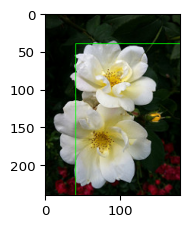

In [ ]:
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
bbs = BoundingBoxesOnImage([
 BoundingBox(x1=40, x2=550, y1=40, y2=780)
], shape=input_img.shape)
ia.imshow(bbs.draw_on_image(input_img))

Training and Testing

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [ ]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

In [ ]:
model.add(MaxPool2D(2,2))

In [ ]:
model.add(Flatten())
model.add(Dense(100,activation='relu'))

In [ ]:
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1600 - accuracy: 0.9521
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0561 - accuracy: 0.9826
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0362 - accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0250 - accuracy: 0.9922
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0172 - accuracy: 0.9946
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0120 - accuracy: 0.9964
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0095 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0073 - accuracy: 0.9975
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0055 - accuracy: 0.9982
Epoch 10/10
1875/1875 [==============================] - 40s 21m

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0557 - accuracy: 0.9862


[0.055704377591609955, 0.9861999750137329]